In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#####data sets to combine
FGOALS_Evap = '/Users/isamarcortes/Dropbox/Isamar/Papers_In_Prep/Paper_1/SupplementaryMaterial/ClimateProjectionsData/FGOALS3/EvaporationRates.xlsx'
GFDL_Evap = '/Users/isamarcortes/Dropbox/Isamar/Papers_In_Prep/Paper_1/SupplementaryMaterial/ClimateProjectionsData/GFDL_ESM4/GFDL_Evaporation.xlsx'
EC_EarthEvap = '/Users/isamarcortes/Dropbox/Isamar/Papers_In_Prep/Paper_1/SupplementaryMaterial/ClimateProjectionsData/EC-Earth3/EC-EarthEvap.xlsx'


In [4]:
def dataRead(data):
    '''
    This function serves to read in all of 
    the regions of interest as dataframes
    '''
    PR = pd.read_excel(data,sheet_name='PuertoRico')
    PR = PR.dropna()
    VZ = pd.read_excel(data,sheet_name='Venezuela')
    VZ = VZ.dropna()
    BH = pd.read_excel(data,sheet_name='Bahamas')
    BH = BH.dropna()
    BZ = pd.read_excel(data,sheet_name='Belize')
    BZ = BZ.dropna()
    CB = pd.read_excel(data,sheet_name='Cuba')
    CB = CB.dropna()
    MX = pd.read_excel(data,sheet_name='Mexico')
    MX = MX.dropna()
    FL = pd.read_excel(data,sheet_name='Florida')
    FL = FL.dropna()

    
    return PR, VZ, BH, BZ, CB, MX, FL

In [5]:
###Data Read
PR_FGoals, VZ_FGoals, BH_FGoals, BZ_FGoals, CB_FGoals, MX_FGoals, FL_FGoals=dataRead(FGOALS_Evap) ##FGOALS
PR_GFDL, VZ_GFDL, BH_GFDL, BZ_GFDL, CB_GFDL, MX_GFDL, FL_GFDL=dataRead(GFDL_Evap) ##GFDL
PR_EC, VZ_EC, BH_EC, BZ_EC, CB_EC, MX_EC, FL_EC=dataRead(EC_EarthEvap) ##EC_EarthEvap

In [114]:
PR_FGoals

,Year,A (Latitude),T26 (mean temp),T45 (mean temp),T70 (mean temp),Rann26,Rann45,Rann70,R26,R45,R70,T-Td (26),T-Td (45),T-Td (70),E26,E26_Year,E45,E45_Year,E70,E70_Year
11,2015-12-01,17.95,25.65,25.00,25.60,16.35,14.04,13.76,8.96,9.58,8.75,9.0618,8.3414,8.0255,0.195818,2.426647,0.184585,2.275658,0.186830,2.325290
23,2016-12-01,17.95,25.94,26.17,25.37,13.77,15.21,14.29,9.48,9.85,10.21,8.5417,9.3269,8.8997,0.193912,2.373577,0.202398,2.406853,0.192167,2.307238
35,2017-12-01,17.95,25.78,25.56,26.01,14.21,15.16,13.11,10.13,9.70,8.83,8.9810,9.0042,7.9921,0.196231,2.379331,0.194595,2.428754,0.189914,2.264518
47,2018-12-01,17.95,25.04,25.68,25.73,14.83,14.84,14.83,9.55,10.79,12.48,8.6168,9.5143,10.4250,0.187160,2.371244,0.199816,2.384124,0.207787,2.393707
59,2019-12-01,17.95,25.81,25.65,25.80,13.70,13.55,13.68,9.85,10.74,9.38,8.6652,9.0252,8.4054,0.193858,2.348195,0.195515,2.322457,0.191618,2.323428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,2096-12-01,17.95,25.76,26.37,28.30,13.57,14.28,14.35,11.07,10.13,9.29,9.2478,9.2238,9.5172,0.198277,2.368907,0.203242,2.496265,0.222938,2.606740
995,2097-12-01,17.95,25.86,26.62,27.65,15.19,14.39,14.72,10.40,8.73,10.34,9.4967,8.6128,9.9627,0.201185,2.436219,0.200242,2.439822,0.220821,2.688094
1007,2098-12-01,17.95,25.74,26.55,27.28,15.83,15.22,15.40,9.49,8.97,8.96,9.1940,9.0046,9.3324,0.197664,2.434389,0.202943,2.544346,0.212095,2.648930
1019,2099-12-01,17.95,25.56,26.38,27.34,14.01,15.46,14.27,9.61,8.85,10.90,8.5540,8.9621,9.9873,0.190874,2.368463,0.201132,2.531528,0.218225,2.613454


In [6]:
def getEvap(FGoals,GFDL,EC):
    '''
    This function works to take all 
    of the evaporation data for SSP 2.6,
    SSP 4.5 and SSP 7.0 and average the 
    3 models
    '''
    E26_F= np.array(FGoals['E26_Year'])
    E26_G = np.array(GFDL['E26_Year'])
    E26_EC = np.array(EC['E26_Year'])
    Evap26 = np.mean(np.array([E26_F,E26_G,E26_EC]),axis=0)
    
    E45_F= np.array(FGoals['E45_Year'])
    E45_G = np.array(GFDL['E45_Year'])
    E45_EC = np.array(EC['E45_Year'])
    Evap45 = np.mean(np.array([E45_F,E45_G,E45_EC]),axis=0)
    
    E70_F= np.array(FGoals['E70_Year'])
    E70_G = np.array(GFDL['E70_Year'])
    E70_EC = np.array(EC['E70_Year'])
    Evap70 = np.mean(np.array([E70_F,E70_G,E70_EC]),axis=0) 
    
    return Evap26, Evap45, Evap70
    

In [7]:
PR26,PR45,PR70 = getEvap(PR_FGoals,PR_GFDL,PR_EC)
VZ26,VZ45,VZ70 = getEvap(VZ_FGoals,VZ_GFDL,VZ_EC)
BH26,BH45,BH70 = getEvap(PR_FGoals,BH_GFDL,BH_EC)
BZ26,BZ45,BZ70 = getEvap(PR_FGoals,BZ_GFDL,BZ_EC)
MX26,MX45,MX70 = getEvap(PR_FGoals,MX_GFDL,MX_EC)
FL26,FL45,FL70 = getEvap(PR_FGoals,FL_GFDL,FL_EC)
CB26,CB45,CB70 = getEvap(PR_FGoals,CB_GFDL,CB_EC)

In [72]:
len(PR26)

1032

In [8]:
PrecipData = '/Users/isamarcortes/Dropbox/Isamar/Papers_In_Prep/Paper_1/SupplementaryMaterial/ClimateProjectionsData/PrecipitationDataAllThree.xlsx'
def readPrecip(data):
    GFDL26 = pd.read_excel(data,sheet_name='GFDL_26')
    GFDL26= GFDL26.dropna()
    GFDL45 = pd.read_excel(data,sheet_name='GFDL_45')
    GFDL45= GFDL45.dropna()
    GFDL70 = pd.read_excel(data,sheet_name='GFDL_70')
    GFDL70= GFDL70.dropna()
        
    FGOALS26 = pd.read_excel(data,sheet_name='FGOALS_26')
    FGOALS26 = FGOALS26.dropna()
    FGOALS45 = pd.read_excel(data,sheet_name='FGOALS_45')
    FGOALS45 = FGOALS45.dropna()
    FGOALS70 = pd.read_excel(data,sheet_name='FGOALS_70')
    FGOALS70 = FGOALS70.dropna()
    
    ECEarth_26 = pd.read_excel(data,sheet_name='ECEarth_26')
    ECEarth_26 = ECEarth_26.dropna()
    ECEarth_45 = pd.read_excel(data,sheet_name='ECEarth_45') 
    ECEarth_45 = ECEarth_45.dropna()
    ECEarth_70 = pd.read_excel(data,sheet_name='ECEarth_70')
    ECEarth_70 = ECEarth_70.dropna()
        
    return GFDL26, GFDL45, GFDL70, FGOALS26, FGOALS45, FGOALS70, ECEarth_26, ECEarth_45, ECEarth_70

In [9]:
GFDL26, GFDL45, GFDL70, FGOALS26, FGOALS45, FGOALS70, ECEarth_26, ECEarth_45, ECEarth_70 = readPrecip(PrecipData)

In [120]:
GFDL26

,Year,Puerto Rico,Puerto Rico_Year,Florida,Florida_Year,Bahamas,Bahamas_Year,Belize,Belize_Year,Mexico,Mexico_Year,Venezuela,Venezuela_Year,Cuba,Cuba_Year
11,2015-12-01,26.51,785.44,66.39,681.65,89.13,717.81,198.39,1439.56,102.34,1057.30,15.56,417.02,41.14,794.18
23,2016-12-01,23.18,602.41,66.29,887.51,80.01,902.23,62.31,1039.10,53.07,777.78,4.26,322.04,34.04,709.86
35,2017-12-01,26.57,1020.99,24.68,1309.41,43.92,1236.41,397.94,1965.20,53.81,1148.44,20.19,470.87,15.26,1436.20
47,2018-12-01,17.65,554.70,15.99,820.75,35.76,792.53,229.14,1399.64,18.96,724.13,66.60,440.66,27.00,1054.82
59,2019-12-01,20.84,793.65,119.46,1152.87,146.40,1185.68,180.08,1587.54,153.25,1031.35,11.66,377.55,176.87,1131.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,2096-12-01,31.06,647.18,43.92,942.84,56.86,973.13,158.36,1398.22,52.51,1237.28,13.24,398.78,57.54,1137.38
995,2097-12-01,17.51,469.00,197.88,1256.96,202.35,1416.86,201.92,1388.70,156.44,1062.43,12.60,433.08,109.58,997.21
1007,2098-12-01,25.52,590.32,29.96,952.95,58.64,1080.95,167.14,1567.23,96.94,991.83,13.34,331.15,25.92,828.91
1019,2099-12-01,18.00,574.94,55.51,909.54,94.11,1111.99,176.26,1027.41,72.71,798.59,13.66,273.65,29.01,790.89


In [10]:
###calculate values
PR26_P = np.mean(np.array([GFDL26['Puerto Rico_Year'],FGOALS26['Puerto Rico_Year'],ECEarth_26['Puerto Rico_Year']]),axis=0)/1000
PR45_P = np.mean(np.array([GFDL45['Puerto Rico_Year'],FGOALS45['Puerto Rico_Year'],ECEarth_45['Puerto Rico_Year']]),axis=0)/1000
PR70_P = np.mean(np.array([GFDL70['Puerto Rico_Year'],FGOALS70['Puerto Rico_Year'],ECEarth_70['Puerto Rico_Year']]),axis=0)/1000

VZ26_P = np.mean(np.array([GFDL26['Venezuela_Year'],FGOALS26['Venezuela_Year'],ECEarth_26['Venezuela_Year']]),axis=0)/1000
VZ45_P = np.mean(np.array([GFDL45['Venezuela_Year'],FGOALS45['Venezuela_Year'],ECEarth_45['Venezuela_Year']]),axis=0)/1000
VZ70_P = np.mean(np.array([GFDL70['Venezuela_Year'],FGOALS70['Venezuela_Year'],ECEarth_70['Venezuela_Year']]),axis=0)/1000

MX26_P = np.mean(np.array([GFDL26['Mexico_Year'],FGOALS26['Mexico_Year'],ECEarth_26['Mexico_Year']]),axis=0)/1000
MX45_P = np.mean(np.array([GFDL45['Mexico_Year'],FGOALS45['Mexico_Year'],ECEarth_45['Mexico_Year']]),axis=0)/1000
MX70_P = np.mean(np.array([GFDL70['Mexico_Year'],FGOALS70['Mexico_Year'],ECEarth_70['Mexico_Year']]),axis=0)/1000

BZ26_P = np.mean(np.array([GFDL26['Belize_Year'],FGOALS26['Belize_Year'],ECEarth_26['Belize_Year']]),axis=0)/1000
BZ45_P = np.mean(np.array([GFDL45['Belize_Year'],FGOALS45['Belize_Year'],ECEarth_45['Belize_Year']]),axis=0)/1000
BZ70_P = np.mean(np.array([GFDL70['Belize_Year'],FGOALS70['Belize_Year'],ECEarth_70['Belize_Year']]),axis=0)/1000

BH26_P = np.mean(np.array([GFDL26['Bahamas_Year'],FGOALS26['Bahamas_Year'],ECEarth_26['Bahamas_Year']]),axis=0)/1000
BH45_P = np.mean(np.array([GFDL45['Bahamas_Year'],FGOALS45['Bahamas_Year'],ECEarth_45['Bahamas_Year']]),axis=0)/1000
BH70_P = np.mean(np.array([GFDL70['Bahamas_Year'],FGOALS70['Bahamas_Year'],ECEarth_70['Bahamas_Year']]),axis=0)/1000

FL26_P = np.mean(np.array([GFDL26['Florida_Year'],FGOALS26['Florida_Year'],ECEarth_26['Florida_Year']]),axis=0)/1000
FL45_P = np.mean(np.array([GFDL45['Florida_Year'],FGOALS45['Florida_Year'],ECEarth_45['Florida_Year']]),axis=0)/1000
FL70_P = np.mean(np.array([GFDL70['Florida_Year'],FGOALS70['Florida_Year'],ECEarth_70['Florida_Year']]),axis=0)/1000

CB26_P = np.mean(np.array([GFDL26['Cuba_Year'],FGOALS26['Cuba_Year'],ECEarth_26['Cuba_Year']]),axis=0)/1000
CB45_P = np.mean(np.array([GFDL45['Cuba_Year'],FGOALS45['Cuba_Year'],ECEarth_45['Cuba_Year']]),axis=0)/1000
CB70_P = np.mean(np.array([GFDL70['Cuba_Year'],FGOALS70['Cuba_Year'],ECEarth_70['Cuba_Year']]),axis=0)/1000

In [101]:
len(PR26)

1032

In [122]:
### Future Enet
EnetPR26 = PR26-PR26_P
EnetPR45 = PR45-PR45_P
EnetPR70 = PR70-PR70_P

EnetVZ26 = VZ26-VZ26_P
EnetVZ45 = VZ45-VZ45_P
EnetVZ70 = VZ70-VZ70_P

EnetBZ26 = BZ26-BZ26_P
EnetBZ45 = BZ45-BZ45_P
EnetBZ70 = BZ70-BZ70_P

EnetBH26 = BH26-BH26_P
EnetBH45 = BH45-BH45_P
EnetBH70 = BH70-BH70_P

EnetCB26 = CB26-CB26_P
EnetCB45 = CB45-CB45_P
EnetCB70 = CB70-CB70_P

EnetFL26 = FL26-FL26_P
EnetFL45 = FL45-FL45_P
EnetFL70 = FL70-FL70_P

EnetMX26 = MX26-MX26_P
EnetMX45 = MX45-MX45_P
EnetMX70 = MX70-MX70_P


In [13]:
def plotData(evaporation,precipitation,enet):
    plt.plot(GFDL26['Year'],evaporation,label='Evap')
    plt.plot(GFDL26['Year'],precipitation,label='Precip')
    plt.plot(GFDL26['Year'],enet,label='Enet')
    
    3plt.xlim('2015-12-01','2024-01-01')
    plt.legend()
    plt.show()
    
plotData(PR26,PR26_P,EnetPR26)

NameError: name 'EnetPR26' is not defined

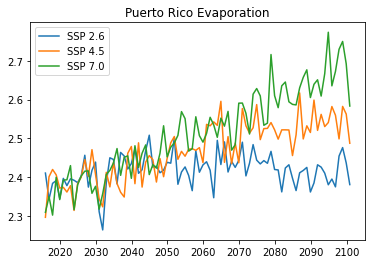

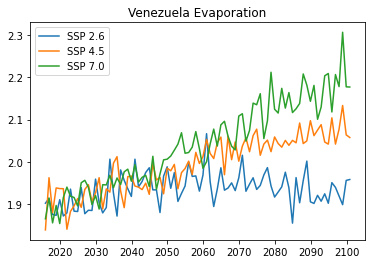

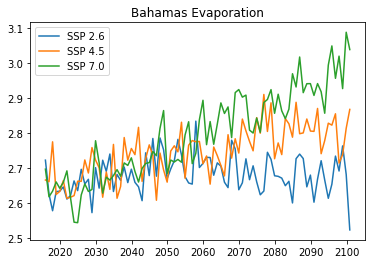

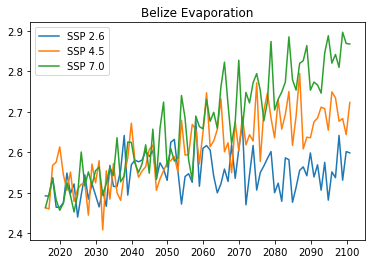

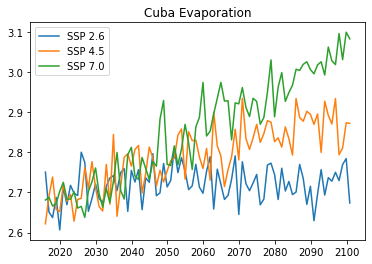

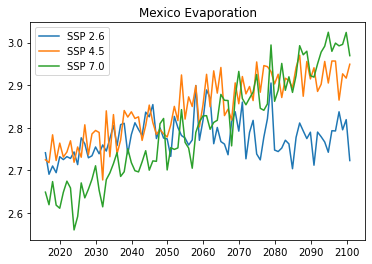

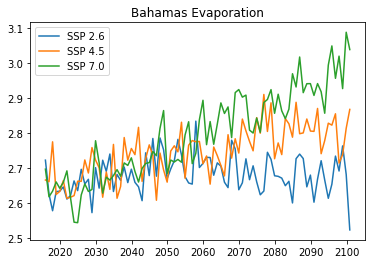

In [12]:
def plotData(RCP26,RCP45,RCP70,Name):
    plt.plot(GFDL26['Year'],RCP26,label='SSP 2.6')
    plt.plot(GFDL26['Year'],RCP45,label='SSP 4.5')
    plt.plot(GFDL26['Year'],RCP70,label='SSP 7.0')
    #plt.xlim(2015,2024)
    plt.legend()
    plt.title(Name)
    plt.show()

plotData(PR26,PR45,PR70,'Puerto Rico Evaporation')
plotData(VZ26,VZ45,VZ70,'Venezuela Evaporation')
plotData(BH26,BH45,BH70,'Bahamas Evaporation')
plotData(BZ26,BZ45,BZ70,'Belize Evaporation')
plotData(CB26,CB45,CB70,'Cuba Evaporation')
plotData(MX26,MX45,MX70,'Mexico Evaporation')
plotData(BH26,BH45,BH70,'Bahamas Evaporation')


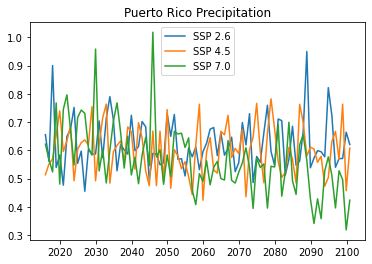

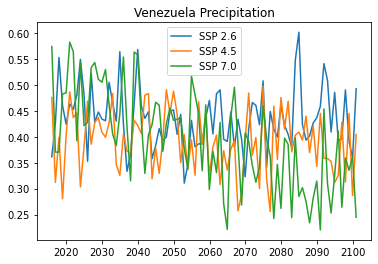

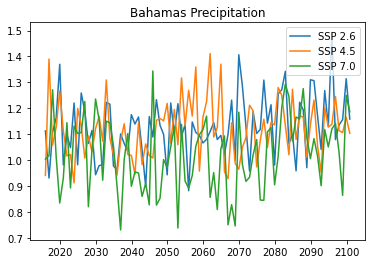

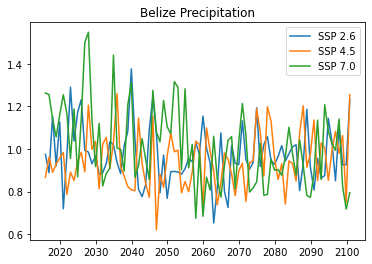

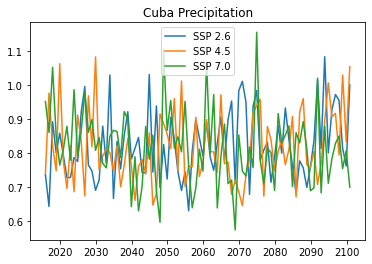

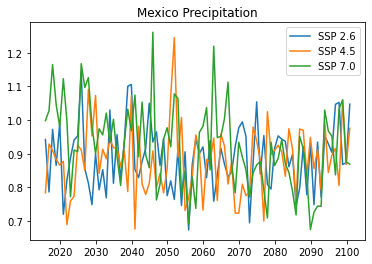

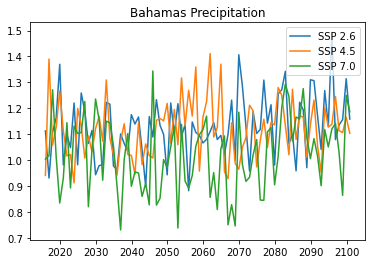

In [129]:
plotData(PR26_P,PR45_P,PR70_P,'Puerto Rico Precipitation')
plotData(VZ26_P,VZ45_P,VZ70_P,'Venezuela Precipitation')
plotData(BH26_P,BH45_P,BH70_P,'Bahamas Precipitation')
plotData(BZ26_P,BZ45_P,BZ70_P,'Belize Precipitation')
plotData(CB26_P,CB45_P,CB70_P,'Cuba Precipitation')
plotData(MX26_P,MX45_P,MX70_P,'Mexico Precipitation')
plotData(BH26_P,BH45_P,BH70_P,'Bahamas Precipitation')

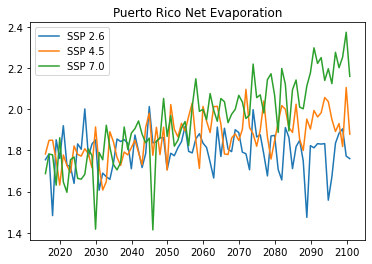

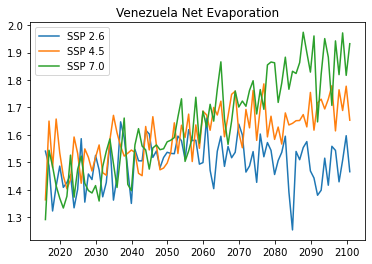

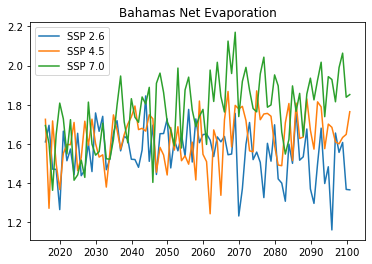

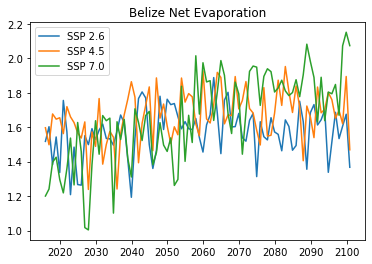

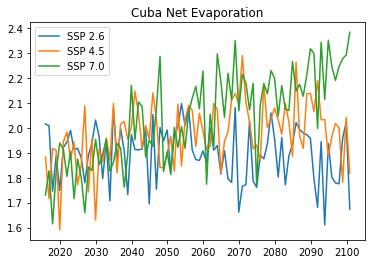

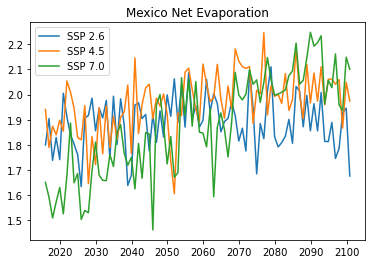

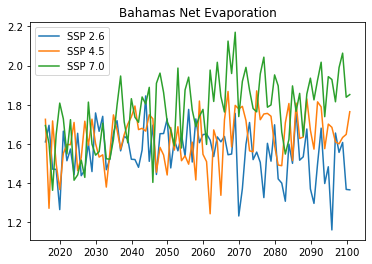

In [131]:
plotData(EnetPR26,EnetPR45,EnetPR70,'Puerto Rico Net Evaporation')
plotData(EnetVZ26,EnetVZ45,EnetVZ70,'Venezuela Net Evaporation')
plotData(EnetBH26,EnetBH45,EnetBH70,'Bahamas Net Evaporation')
plotData(EnetBZ26,EnetBZ45,EnetBZ70,'Belize Net Evaporation')
plotData(EnetCB26,EnetCB45,EnetCB70,'Cuba Net Evaporation')
plotData(EnetMX26,EnetMX45,EnetMX70,'Mexico Net Evaporation')
plotData(EnetBH26,EnetBH45,EnetBH70,'Bahamas Net Evaporation')

<AxesSubplot:xlabel='date_ordinal', ylabel='RCP 7.0'>

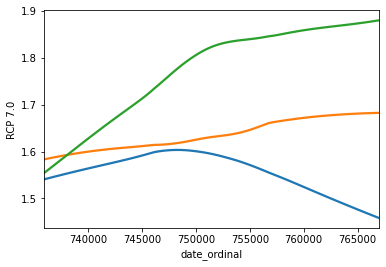

In [102]:
#plt.scatter(PR_FGoals['Year'],EnetPR26)

Dataset = {'Year':PR_FGoals['Year'],'RCP 2.6':EnetBH26,'RCP 4.5':EnetBH45,'RCP 7.0':EnetBH70}
df = pd.DataFrame(data=Dataset)

from datetime import date

df['date_ordinal'] = pd.to_datetime(df['Year']).apply(lambda date: date.toordinal())

sns.regplot(x='date_ordinal', y="RCP 2.6", scatter=False,lowess=True,data=df)
sns.regplot(x='date_ordinal', y="RCP 4.5", scatter=False,lowess=True,data=df)
sns.regplot(x='date_ordinal', y="RCP 7.0", scatter=False,lowess=True,data=df)

In [43]:
df


,Year,RCP 2.6,RCP 4.5,RCP 7.0,date_ordinal
0,2020-01-01,0.159394,0.161356,0.164381,737425
1,2020-02-01,0.158260,0.154742,0.166878,737456
2,2020-03-01,0.162271,0.159421,0.167916,737485
3,2020-04-01,0.166981,0.157146,0.164898,737516
4,2020-05-01,0.151093,0.151227,0.168228,737546
...,...,...,...,...,...
967,2100-08-01,0.135791,0.144212,0.218457,766857
968,2100-09-01,0.162281,0.127276,0.124492,766888
969,2100-10-01,0.111706,0.131412,0.111756,766918
970,2100-11-01,0.142802,0.131047,0.169377,766949
